In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from numba import njit
from src.game import discrete_geometry as dg

## Matplotlib stuff

In [ ]:
def mk_rectangles(ax, xy_list, alpha=0.1):
    for xy in xy_list:
        rect = patches.Rectangle(xy, 1, 1, facecolor='k', alpha=alpha)
        ax.add_patch(rect)

def mk_grid(xy_list, alpha=0.1):
    fig, ax = plt.subplots()
    mk_rectangles(ax, xy_list, alpha)
    plt.xlim([0, 80])
    plt.ylim([0, 60])
    ax.set_xticks(np.linspace(0,80,81))
    ax.set_yticks(np.linspace(0,60,61))
    plt.grid()
    plt.show()

## Utils

In [ ]:
def mk_all_edge_xy(dims):
    xy_list = []
    for x in range(dims[0]):
        for y in range(dims[1]):
            if x == 0 or x == dims[0]-1 or y == 0 or y == dims[1]-1:
                xy = [x, y]
                xy_list.append(xy)
    return np.array(xy_list)


In [ ]:
def times_per_sec(func, *args, **kwargs):
    iters = 1000
    t0 = time.time()
    for _ in range(iters):
        func(*args, **kwargs)
    t1 = time.time()
    print(iters/(t1-t0))

## Geometry

## Experiments

In [ ]:
dims = (80, 60)
xy = [40, 30]
density = 360
dm = dims
radial = dg.bresenham_radial(dm) + xy

# Chunks of Grid

In [44]:
origin_xy = np.array((10,10))
end_xy = np.array((40,21))
bline = dg.bresenham_numba(origin_xy[None], end_xy[None])
bline = bline[0]
coll_i = len(bline)-2
coll_xy = bline[coll_i]
new_bline = dg.bline_reflect(origin_xy, bline, coll_i)


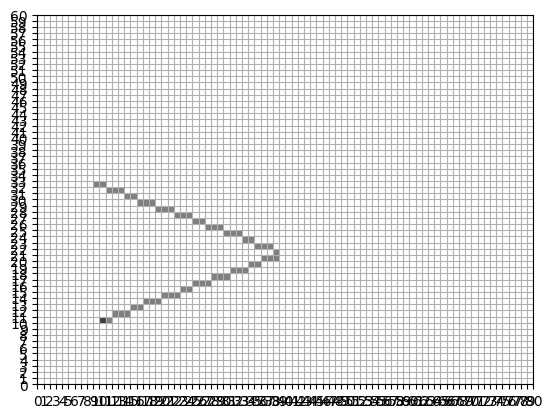

In [45]:
# XY_LIST = bline
XY_LIST = np.concatenate((origin_xy[None], origin_xy[None], coll_xy[None], coll_xy[None]))
XY_LIST = np.concatenate((XY_LIST, bline[:coll_i], new_bline))
mk_grid(XY_LIST, 0.5)